In [2]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

#### Подготовка данных

In [3]:
with open('data_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('data_test_no_labels.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

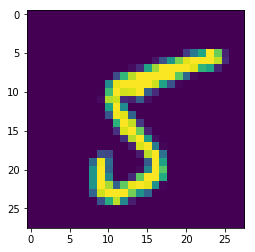

In [3]:
plt.imshow(train['data'][0].reshape(28,28))
plt.show()

In [4]:
#нормировка данных
def data_preparation(X):
    #каждая строчка - наш объект (10000x784), 784 признака у объекта
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / (std+0.000001)
    
    #в матрицу X необходимо ввести столбец, весь состоящий из единиц (чтобы было слагаемое w0 (свободный член))
    X = np.hstack([ np.ones((X.shape[0], 1)), X])
    return X

In [5]:
#перевод ответов в вероятности
def labels_preparation(labels):
    #каждый элемент - целевая переменная (5 или 6) (1x10000)
    labels[labels==6] = 1
    labels[labels==5] = -1
    return labels

In [6]:
#разбиваем на тестовую и обучающую выборки
def divide_data(X, y):
    np.random.seed(11)
    msk = np.random.rand(X.shape[0]) < 0.8
    y_train, X_train = y[msk], X[msk]
    y_test, X_test = y[~msk], X[~msk]
    
    return X_train, y_train, X_test, y_test

#### Методы для обучения, его результаты

In [7]:
def w_initial1(X):
    np.random.seed(12)
    w = np.random.normal(scale=0.0001, size = X.shape[1])
    return w

In [8]:
def w_initial2(X):
    np.random.seed(13)
    w = np.random.uniform(-1/X.shape[0], 1/X.shape[0], size = X.shape[1])
    return w

In [9]:
def propability(w, X):
    p = 1.0 / ( 1.0 + np.exp(-np.dot(w, X.T)))
    return p

In [10]:
def logloss(X, w, y):
    y_ = np.dot(w, X.T)
    return 1.0 / y.shape[0] * np.sum( np.log(1 + np.exp(-y * y_)) ) 

In [11]:
def accuracy(X, w, y):
    p = propability(w, X)
    
    p[p > 0.5] = 1
    p[p <= 0.5] = -1
    e = np.sum(abs(p - y))/2
    return (p.shape[0] - e) * 1.0 / p.shape[0]

In [12]:
#стохастический градиентный спуск
def grad_down_loss(X_train, y_train, X_test, y_test, w, iterat = 300, etha = 0.0002, lmbd = 0):
    
    train_eval = np.zeros((2, iterat))
    test_eval = np.zeros((2, iterat))
    
    for iter in tqdm.tqdm_notebook(range(iterat)):
        """
        sh_ind = np.arange(X_train.shape[0])
        np.random.permutation(sh_ind)
        X_train = X_train[sh_ind]
        y_train = y_train[sh_ind]
        """
        for i in range(X_train.shape[0]):
            j = np.random.randint(0, X_train.shape[0])
            # вычисляем по формуле для линейного классификатора с сигмоидой
            grad = - y_train[j] * X_train[j] / ( 1 + math.exp( y_train[j] * np.dot(w.T, X_train[j])) ) + lmbd * w
            w = w - etha * grad

        train_eval[0][iter] = logloss(X_train, w, y_train)
        test_eval[0][iter] = logloss(X_test, w, y_test)
            
        train_eval[1][iter] = accuracy(X_train, w, y_train)
        test_eval[1][iter] = accuracy(X_test, w, y_test)
    
        print("{} iter loss. Train : {} . Test : {}".format(iter, train_eval[0][iter], test_eval[0][iter]))

    return w, train_eval, test_eval

In [13]:
X = data_preparation(train['data'])
y = labels_preparation(train['labels'])
X_train, y_train, X_test, y_test = divide_data(X, y)
w = w_initial1(X)
w, train_eval, test_eval = grad_down_loss(X_train, y_train, X_test, y_test, w)

0 iter loss. Train : 0.09457883776609781 . Test : 0.09858687706579204
1 iter loss. Train : 0.0769912680351603 . Test : 0.08212118140995141
2 iter loss. Train : 0.06863002211372712 . Test : 0.07623044428014637
3 iter loss. Train : 0.06438618598034201 . Test : 0.07265560160321821
4 iter loss. Train : 0.0612850639236703 . Test : 0.07079620167621717
5 iter loss. Train : 0.058606254201404605 . Test : 0.06920916826814197
6 iter loss. Train : 0.05660515490757321 . Test : 0.0676683716532686
7 iter loss. Train : 0.054966679125639566 . Test : 0.06742675900665063
8 iter loss. Train : 0.053619562789620046 . Test : 0.06598672387123102
9 iter loss. Train : 0.052425181963742774 . Test : 0.06531871290948593
10 iter loss. Train : 0.05122275807922316 . Test : 0.06460781987050762
11 iter loss. Train : 0.050428723514925194 . Test : 0.06399677517409326
12 iter loss. Train : 0.04932783440353548 . Test : 0.06375073805009379
13 iter loss. Train : 0.048564270977086446 . Test : 0.0639708500174884
14 iter loss. 

227 iter loss. Train : 0.02624597682015141 . Test : 0.06540842464577287
228 iter loss. Train : 0.026194322693830183 . Test : 0.06603439924589151
229 iter loss. Train : 0.026144415654406613 . Test : 0.06624073721893824
230 iter loss. Train : 0.026128335707092547 . Test : 0.06578629951653424
231 iter loss. Train : 0.026097263890192627 . Test : 0.06632956937059074
232 iter loss. Train : 0.026042641581283207 . Test : 0.06588599581732207
233 iter loss. Train : 0.02601195848005137 . Test : 0.06635808653425022
234 iter loss. Train : 0.025992643892055835 . Test : 0.06624903441672648
235 iter loss. Train : 0.02594383641733139 . Test : 0.06622739302496392
236 iter loss. Train : 0.025915726103419242 . Test : 0.06625224240344353
237 iter loss. Train : 0.02594119797503705 . Test : 0.06594263558656688
238 iter loss. Train : 0.025980695250161775 . Test : 0.0659466575829212
239 iter loss. Train : 0.0258812384442324 . Test : 0.06616146035518053
240 iter loss. Train : 0.0258205751507585 . Test : 0.06616

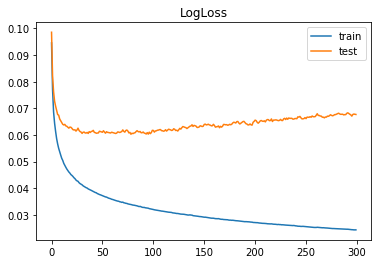

In [14]:
plt.title('LogLoss')
plt.plot(train_eval[0], label='train')
plt.plot(test_eval[0], label='test')
plt.legend()

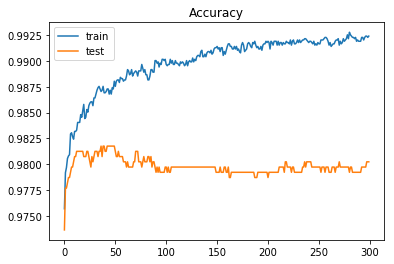

In [15]:
plt.title('Accuracy')
plt.plot(train_eval[1], label='train')
plt.plot(test_eval[1], label='test')
plt.legend()

In [16]:
w = w_initial1(X)
w, train_eval, test_eval = grad_down_loss(X_train, y_train, X_test, y_test, w, iterat = 50)

0 iter loss. Train : 0.09457883776609781 . Test : 0.09858687706579204
1 iter loss. Train : 0.0769912680351603 . Test : 0.08212118140995141
2 iter loss. Train : 0.06863002211372712 . Test : 0.07623044428014637
3 iter loss. Train : 0.06438618598034201 . Test : 0.07265560160321821
4 iter loss. Train : 0.0612850639236703 . Test : 0.07079620167621717
5 iter loss. Train : 0.058606254201404605 . Test : 0.06920916826814197
6 iter loss. Train : 0.05660515490757321 . Test : 0.0676683716532686
7 iter loss. Train : 0.054966679125639566 . Test : 0.06742675900665063
8 iter loss. Train : 0.053619562789620046 . Test : 0.06598672387123102
9 iter loss. Train : 0.052425181963742774 . Test : 0.06531871290948593
10 iter loss. Train : 0.05122275807922316 . Test : 0.06460781987050762
11 iter loss. Train : 0.050428723514925194 . Test : 0.06399677517409326
12 iter loss. Train : 0.04932783440353548 . Test : 0.06375073805009379
13 iter loss. Train : 0.048564270977086446 . Test : 0.0639708500174884
14 iter loss. 

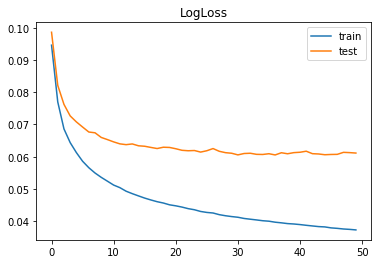

In [17]:
plt.title('LogLoss')
plt.plot(train_eval[0], label='train')
plt.plot(test_eval[0], label='test')
plt.legend()

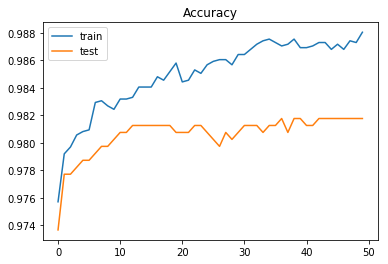

In [18]:
plt.title('Accuracy')
plt.plot(train_eval[1], label='train')
plt.plot(test_eval[1], label='test')
plt.legend()